# Task 4

# Step 1: Install Required Libraries

In [40]:
!pip install nltk scikit-learn matplotlib seaborn


# Step 2: Download and Load the IMDB Dataset

In [41]:
import urllib.request
import tarfile
from sklearn.datasets import load_files

# Download the dataset
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
urllib.request.urlretrieve(url, "aclImdb_v1.tar.gz")

# Extract
with tarfile.open("aclImdb_v1.tar.gz", "r:gz") as tar:
    tar.extractall()

# Load data
reviews = load_files("aclImdb/train", categories=['pos', 'neg'])
X, y = reviews.data, reviews.target


# Step 3: Preprocess the Text

In [42]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
stop_words = stopwords.words('english')
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r"<.*?>", "", text.decode("utf-8"))
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.lower().split()
    return " ".join(stemmer.stem(word) for word in text if word not in stop_words)

X_clean = [preprocess(doc) for doc in X]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Step 4: Feature Extraction

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)
X_features = vectorizer.fit_transform(X_clean).toarray()


# Step 5: Train-Test Split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)


# Step 6: Train a Naive Bayes Classifier

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Step 7: Evaluate the Model

Accuracy: 0.8456

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85      2482
           1       0.85      0.84      0.85      2518

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



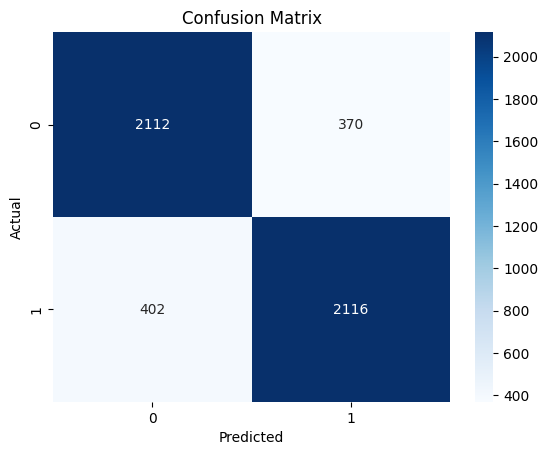

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# Step 8: Insights
You can add a markdown cell summarizing:

Model accuracy

Confusion matrix interpretation

 Suggestions (e.g., use of TF-IDF, deep learning)